# MICROSOFT STUDIO PROJECT
  **`PROJECT DONE BY: JENNIFER NJERI`**

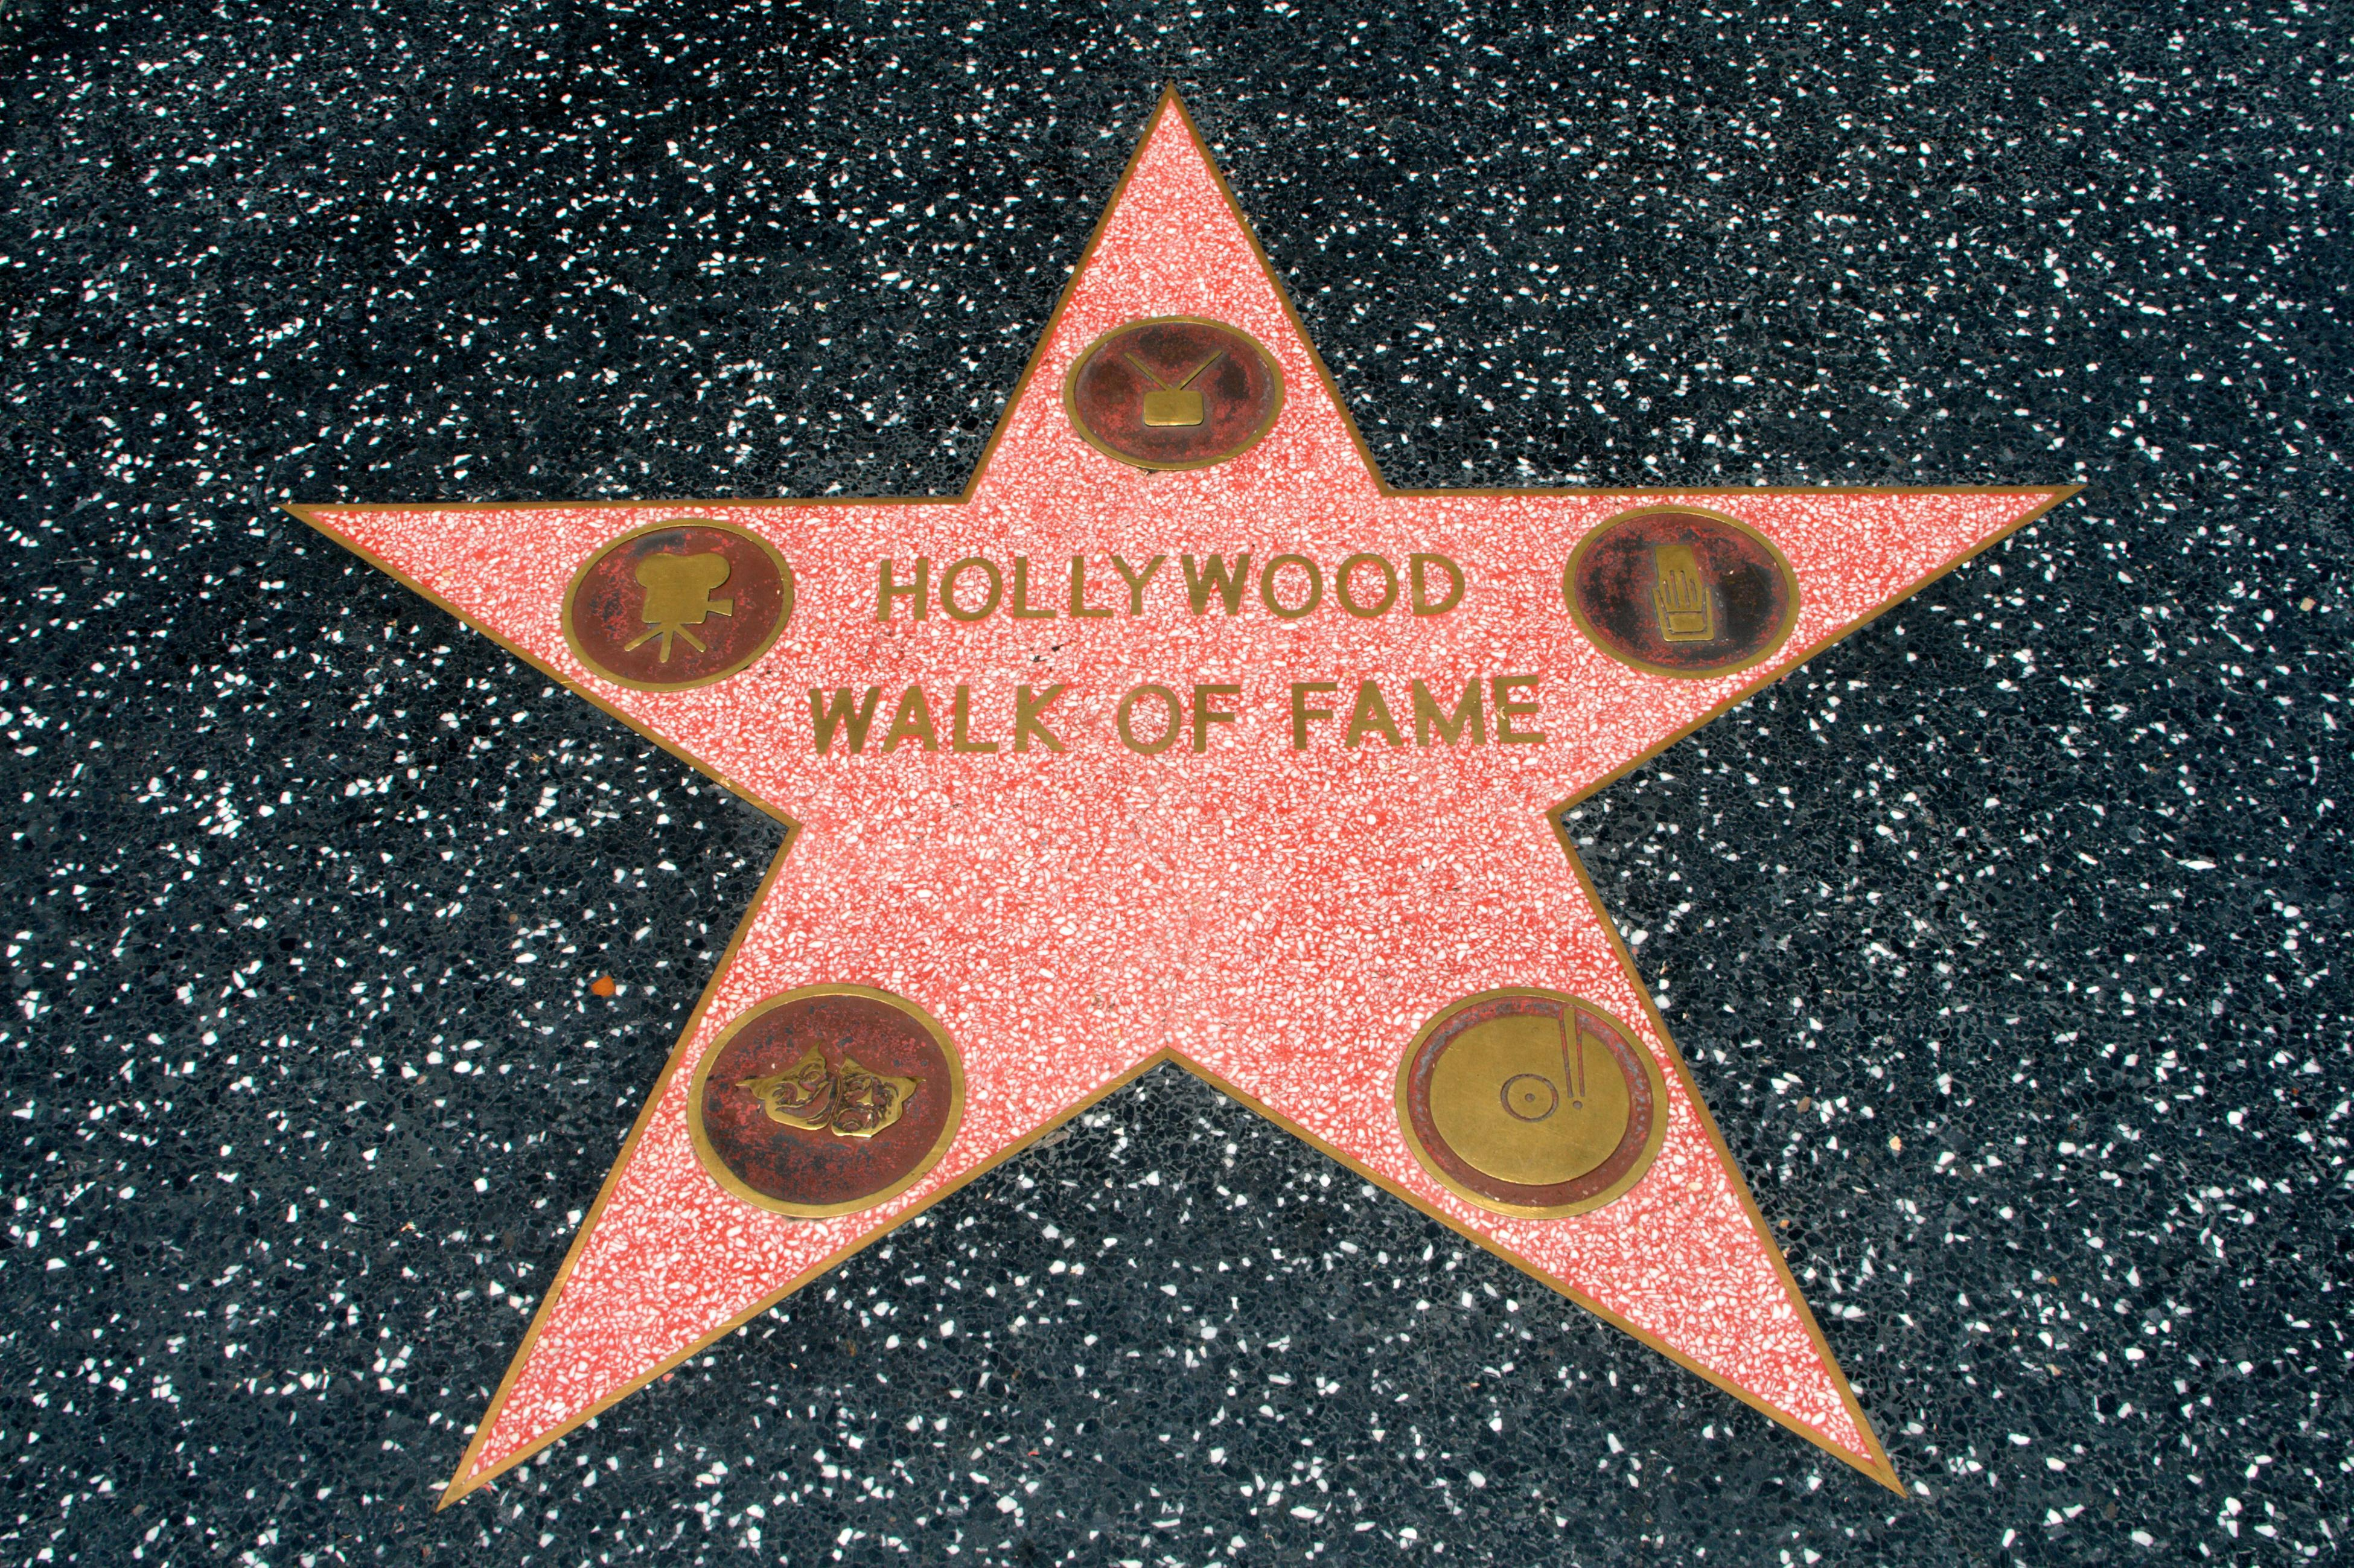

Microsoft is a multinational technology company that was founded on April 4, 1975, by Bill Gates and Paul Allen. It is one of the world's largest and most influential technology corporations. Headquartered in Redmond, Washington, USA.

The company's primary focus is on developing, manufacturing, licensing, and supporting software products and services. Microsoft is best known for its operating system, Microsoft Windows, which is used by a vast majority of personal computers worldwide.

Microsoft, witnessing the success of major companies producing original video content, seeks to venture into the movie industry by establishing a new movie studio. However, lacking experience in film production, they have entrusted us with the task of exploring the most successful film types at the box office. Our mission is to delve into the datasets from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to extract essential insights. These findings will serve as actionable recommendations for the head of Microsoft's new movie studio, aiding them in deciding which types of films to create for maximum impact and commercial success.

**`OBJECTIVES`**
1. Understand the film industry
2. Explore genre ratings, popularity and runtime
3. Analyse the profitability of the production of sequels
4. Select seasoned crew members per genre


Through this analysis, we aim to gain a comprehensive understanding of the distributions, relationships, and possible correlations between the variables present in the data. By exploring these key aspects, we can uncover valuable insights and patterns that will facilitate informed decision-making and enhance our understanding of the underlying data trends in the film industry.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**`UNDERSTAND THE FILM INDUSTRY`**

**DATASET ONE: bom.movie_gross.csv**

In [2]:
# Read 'bom.movie_gross.csv' and explore the overview of the data set

bom_gross_df = pd.read_csv('/content/bom.movie_gross.csv')
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Understand the structure of bom_gross_df
print('Shape of bom_gross_df:', bom_gross_df.shape)

bom_gross_df.info()

Shape of bom_gross_df: (3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Observation:

The bom_gross_df has 3387 rows and 5 columns. Some columns have missing values, the columns with missing values are studio, domestic_gross and foreign_gross. The year column is in integer format instead of date format and foreign gross is in string format instead of float format.

In [4]:
#Find the percentage of missing values in bom_gross_df
bom_gross_df.isna().mean() * 100


title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

Handling missing values:

1. Studio and domestic_gross has a negligible percentage of missing values. Dropping the rows that have the missing values in those rows is ideal.

2. Foreign_gross has 39.8% missing values, this is an important column as it contributes to the total revenues of the movies. The percentage of missing values is too high to drop its rows. The missing values shall be replaced with measures of central tendancy; outliers (if any) shall determine which statistical method we shall use.



*`1. Clean entries in studio and domestic_gross columns`*:

In [5]:
# Drop NaN rows in Studio and Domestic_gross columns and confirm the drop
bom_gross_df = bom_gross_df.dropna(subset= ['studio' , 'domestic_gross'])
bom_gross_df.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [6]:
# Check for whitespaces and commas in studio column
print('Number of values with commas:', bom_gross_df['studio'].str.contains(',', regex=True). sum())
print('Number of values with whitespaces:', bom_gross_df['studio'].str.contains(' ', regex=True). sum())

# Remove whitespaces in studio column
bom_gross_df['studio'] = bom_gross_df['studio'].str.replace(' ', '')
print('Number of values with whitespaces after correction:', bom_gross_df['studio'].str.contains(' ', regex=True). sum())

Number of values with commas: 0
Number of values with whitespaces: 58
Number of values with whitespaces after correction: 0


<ipython-input-6-bdf5466e741c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_gross_df['studio'] = bom_gross_df['studio'].str.replace(' ', '')


*`2. Deal with missing values in foreign_gross column`*


In [7]:
# Check for whitespaces and commas
print('Number of values with commas:', bom_gross_df['foreign_gross'].str.contains(',', regex=True). sum())
print('Number of values with whitespaces:', bom_gross_df['foreign_gross'].str.contains(' ', regex=True). sum())

# Remove the commas
bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].str.replace(',', '')
print('Number of values with commas after correction:' , bom_gross_df['foreign_gross'].str.contains(',', regex=True). sum())

Number of values with commas: 5
Number of values with whitespaces: 0
Number of values with commas after correction: 0


<ipython-input-7-9e96fa79b7f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].str.replace(',', '')


In [8]:
# Convert foreign_gross to float format and confirm changes
bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].astype(float)
bom_gross_df['foreign_gross'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3356 entries, 0 to 3386
Series name: foreign_gross
Non-Null Count  Dtype  
--------------  -----  
2007 non-null   float64
dtypes: float64(1)
memory usage: 52.4 KB


<ipython-input-8-727139a369fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].astype(float)


In [9]:
# Identify outliers (if any)

# Calculate the quartiles
Q1 = bom_gross_df['foreign_gross'].quantile(0.25)
Q3 = bom_gross_df['foreign_gross'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set the lower and upper fence for outlier detection
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

print('lower_fence =' , lower_fence)
print('upper_fence =', upper_fence)

# Find number of entries with outliers
bomgross_outliers = bom_gross_df[(bom_gross_df['foreign_gross'] < lower_fence) |
              (bom_gross_df['foreign_gross'] > upper_fence)]
print('Number of entries with outliers:' , len(bomgross_outliers))

lower_fence = -104175000.0
upper_fence = 184025000.0
Number of entries with outliers: 256


Observation:

The data characteristics of this column are based on the revenue generated by movies, and it is expected that the values will be diverse. Therefore, the presence of outliers is likely representative of the extreme values that can occur in this context. It is important to preserve the integrity of the data and retain these outliers as they contribute to the overall understanding of the revenue distribution in the movie industry.

In the 'foreign_gross' column, we have identified the presence of 256 outliers. Given the nature of the data and the potential influence of these outliers, we have decided to use the median as the measure of central tendency to fill the missing values. The median is less affected by extreme values, making it the best choice in this scenario.

In [10]:
# Fill missing values with the median and confirm there are no missing values

median_value = bom_gross_df['foreign_gross'].median()

# Fill missing values
bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].fillna(median_value)

print('Current missing values:' , bom_gross_df['foreign_gross'].isna().sum())

Current missing values: 0


Now that we have cleaned the numerical data, our next step is to check for duplicates in the 'titles' column. It is crucial to identify which movie entries have been repeated. If any duplicates are found, we will examine them and proceed to clean the categorical data in the 'titles' column.

In [11]:
# Check for duplicates
duplicates = bom_gross_df.duplicated(subset=['title'])
print('Number of duplicate values:' , duplicates.sum())

# Examine duplicate entries
duplicate_entries = bom_gross_df[bom_gross_df.duplicated(subset=['title'], keep=False)]
duplicate_entries

Number of duplicate values: 1


,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200.0,2010
3045,Bluebeard,WGUSA,43100.0,19400000.0,2017


It seems like Bluebeard has duplicate values with different studios, domestic gross, foreign gross, and release years. We can assume these are multiple releases or different versions of the movie over time. We shall keep this in mind while analysing data this dataset.



---



---



We will now understand the market structure by finding out:
  1. Which studios have the largest market share in terms of revenue generated?
  2. Which studios have the largest market share in terms of number of movies produced?
  3. Is there a correlation between the number of movies produced and total_revenue?
  4. Visualize the difference between the two market share dynamics for the top ten studios in each category. Is there a difference?

**`Which studios have the largest market share in terms of revenue generated?`**

In [12]:
# Find the total revenue generated per movie
bom_gross_df['total_revenue'] = bom_gross_df['domestic_gross'] + bom_gross_df['foreign_gross']
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_revenue
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [13]:
# Find total revenue generated per studio
studio_revenue_df = bom_gross_df.groupby('studio')['total_revenue'].sum().reset_index()
studio_revenue_df

,studio,total_revenue
0,3D,1.600000e+07
1,A23,3.896420e+07
2,A24,1.144656e+09
3,ADC,3.904820e+07
4,AF,8.324290e+07
...,...,...
250,XL,3.925800e+07
251,YFG,2.050000e+07
252,Yash,4.401921e+08
253,Zee,1.671000e+06


There are 255 studios, we need to get the top 10 studios in the market.

In [14]:
# Find top 10 studios
studio_revenue_df = studio_revenue_df.sort_values(by='total_revenue', ascending=False)
top_ten_studios = studio_revenue_df.head(10)
top_ten_studios

,studio,total_revenue
36,BV,4.425168e+10
93,Fox,3.104417e+10
244,WB,3.102995e+10
236,Uni.,2.981536e+10
213,Sony,2.248252e+10
183,Par.,1.968506e+10
245,WB(NL),1.035410e+10
134,LGF,8.885583e+09
133,LG/S,5.509524e+09
170,P/DW,5.076500e+09


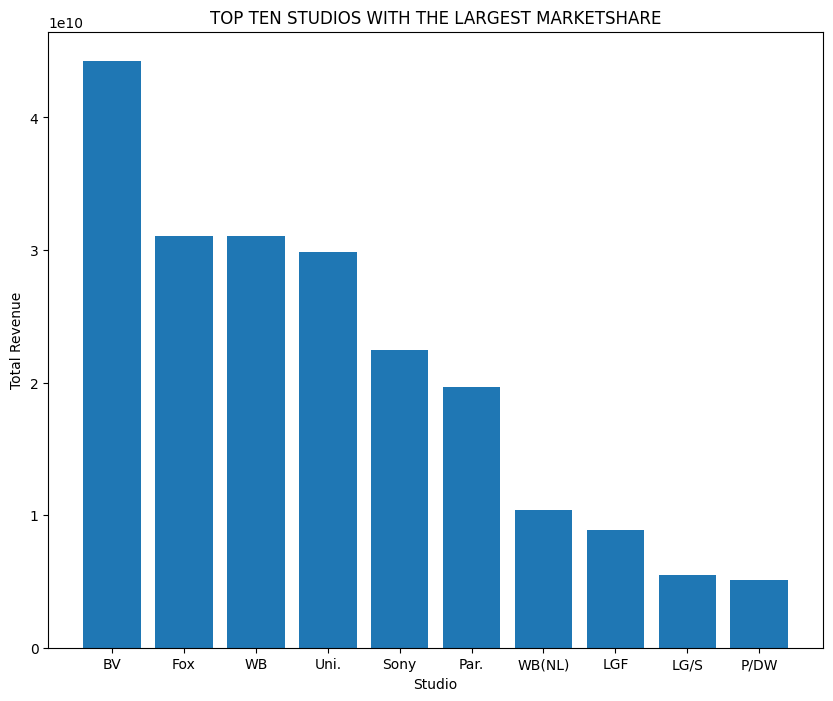

In [15]:
# Plot a barchart showing the total revenue for the top ten studios
plt.figure(figsize=(10, 8))
plt.bar(top_ten_studios['studio'], top_ten_studios['total_revenue'])
plt.xlabel('Studio')
plt.ylabel('Total Revenue')
plt.title('TOP TEN STUDIOS WITH THE LARGEST MARKETSHARE')
plt.show();

Disney's Buena Vista studio dominates the market with the largest market share, significantly surpassing all other studios. Fox Pictures, Warner Bros, and Universal Studios are in a closely contested race for the second-best position. Sony and Paramount Pictures secure the third position.

We should find the exact percentage shares of the market these studios have.

In [16]:
# Find the sum of entire total revenue
sum_total_revenue = bom_gross_df['total_revenue'].sum()

# Find the percentage market share of the top ten studios
top_ten_studios['percentage_marketshare'] = (top_ten_studios['total_revenue']/sum_total_revenue) * 100
top_ten_studios

<ipython-input-16-b2fb097cc8d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_studios['percentage_marketshare'] = (top_ten_studios['total_revenue']/sum_total_revenue) * 100


,studio,total_revenue,percentage_marketshare
36,BV,4.425168e+10,16.100947
93,Fox,3.104417e+10,11.295400
244,WB,3.102995e+10,11.290227
236,Uni.,2.981536e+10,10.848301
213,Sony,2.248252e+10,8.180250
183,Par.,1.968506e+10,7.162395
245,WB(NL),1.035410e+10,3.767333
134,LGF,8.885583e+09,3.233014
133,LG/S,5.509524e+09,2.004637
170,P/DW,5.076500e+09,1.847081


Observation:

1. BV (Buena Vista by Disney):
    Total Revenue - $44.25 billion, Percentage Market Share - 16.10%
2. Fox: Total Revenue - $31.04 billion, Percentage Market Share - 11.30%
3. WB (Warner Bros):
    Total Revenue - $31.03 billion, Percentage Market Share - 11.29%
4. Uni. (Universal Studios):
    Total Revenue - $29.82 billion, Percentage Market Share - 10.85%
5. Sony:
    Total Revenue - $22.48 billion, Percentage Market Share - 8.18%
6. Par. (Paramount Pictures):
    Total Revenue - $19.69 billion, Percentage Market Share - 7.16%


**`Which studios have produced the most movies?`**

In [17]:
# Find number of movies released per studio
movies_per_studio = bom_gross_df['studio'].value_counts()
movies_per_studio

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
TVC             1
E1              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 255, dtype: int64

In [18]:
# View the value counts with the total revenue and arrange in descending order
nummovies_vs_revenue = pd.DataFrame({
    'num_movies': movies_per_studio,
    'total_revenue': bom_gross_df.groupby('studio')['total_revenue'].sum()
})
nummovies_vs_revenue = nummovies_vs_revenue.sort_values(by='num_movies', ascending=False).reset_index()
nummovies_vs_revenue

,index,num_movies,total_revenue
0,IFC,166,2.412592e+09
1,Uni.,147,2.981536e+10
2,WB,140,3.102995e+10
3,Fox,136,3.104417e+10
4,Magn.,136,2.140088e+09
...,...,...,...
250,EXCL,1,1.971900e+07
251,FEF,1,2.001300e+07
252,FInd.,1,6.080000e+05
253,PDF,1,1.941170e+07


In [19]:
# Top 10 studios by number of movies

top10_by_nummovies = nummovies_vs_revenue.head(10)
top10_by_nummovies

,index,num_movies,total_revenue
0,IFC,166,2.412592e+09
1,Uni.,147,2.981536e+10
2,WB,140,3.102995e+10
3,Fox,136,3.104417e+10
4,Magn.,136,2.140088e+09
5,SPC,123,2.640437e+09
6,Sony,109,2.248252e+10
7,BV,106,4.425168e+10
8,LGF,102,8.885583e+09
9,Par.,101,1.968506e+10


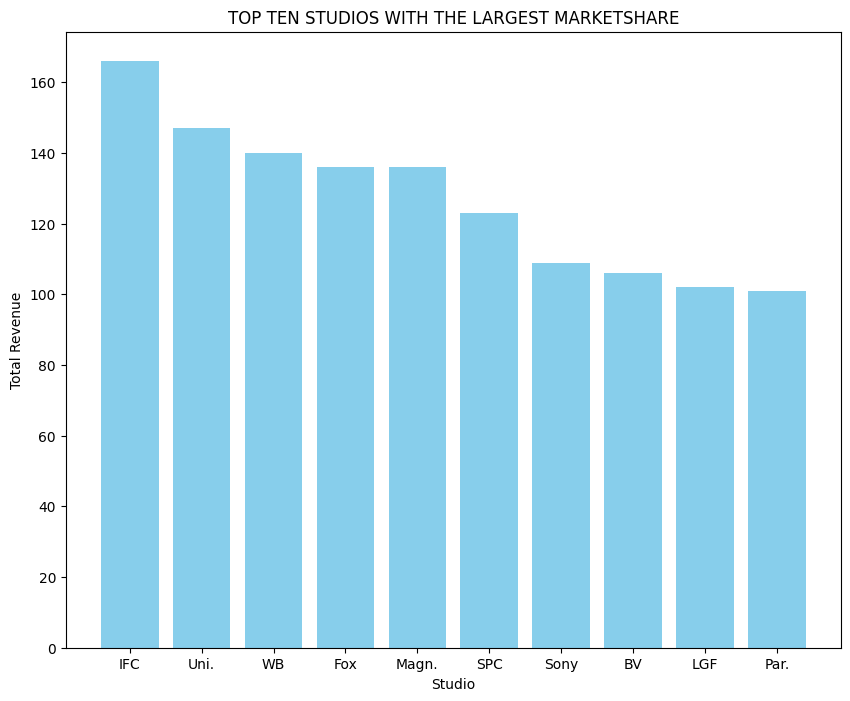

In [20]:
# Plot a barchart of the top ten movies in terms of number of movies
plt.figure(figsize=(10, 8))
plt.bar(top10_by_nummovies['index'], top10_by_nummovies['num_movies'], color='skyblue' )
plt.xlabel('Studio')
plt.ylabel('Total Revenue')
plt.title('TOP TEN STUDIOS WITH THE LARGEST MARKETSHARE')
plt.show();

**`Is there a correlation between the number of movies produced and total_revenue?`**

In [21]:
# Find the correlation between number of movies and total revenue generated
correlation = nummovies_vs_revenue['num_movies'].corr(nummovies_vs_revenue['total_revenue'])

print("Correlation between number of movies produced and total revenue:", correlation)

Correlation between number of movies produced and total revenue: 0.6970852683415834


The correlation coefficient of 0.697 indicates a moderately strong positive relationship where a majority of movies with highest returns produced more movies.

Let's visualize this.

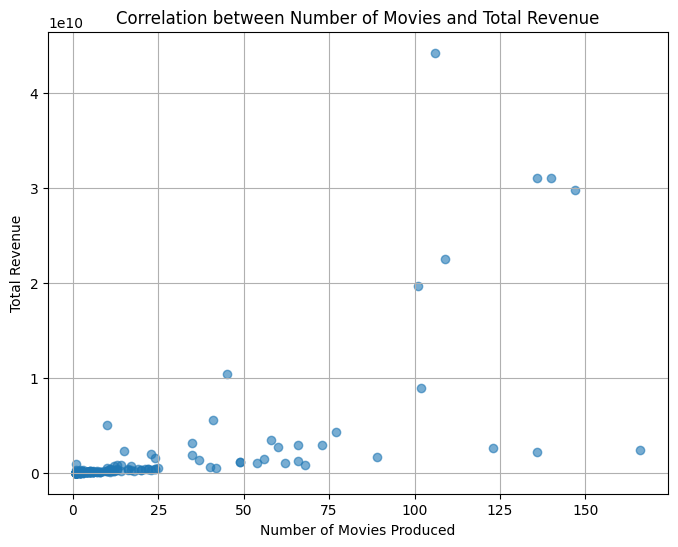

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(nummovies_vs_revenue['num_movies'], nummovies_vs_revenue['total_revenue'], alpha=0.6)
plt.xlabel('Number of Movies Produced')
plt.ylabel('Total Revenue')
plt.title('Correlation between Number of Movies and Total Revenue')
plt.grid(True)
plt.show();

Here we see that a majority of studios that released less than 100 movies have had a total revenue of less that 10 billion dollars. Only 4 studios that produced more than 100 movies remained in the under 10 billion dollars mark. It is important to note than only 6 studios that produced more than 100 movies had a revenue significantly greater that 10 billion dollars.

**`Visualize the difference between the two market share dynamics for the top ten studios in each category. Is there a difference?`**

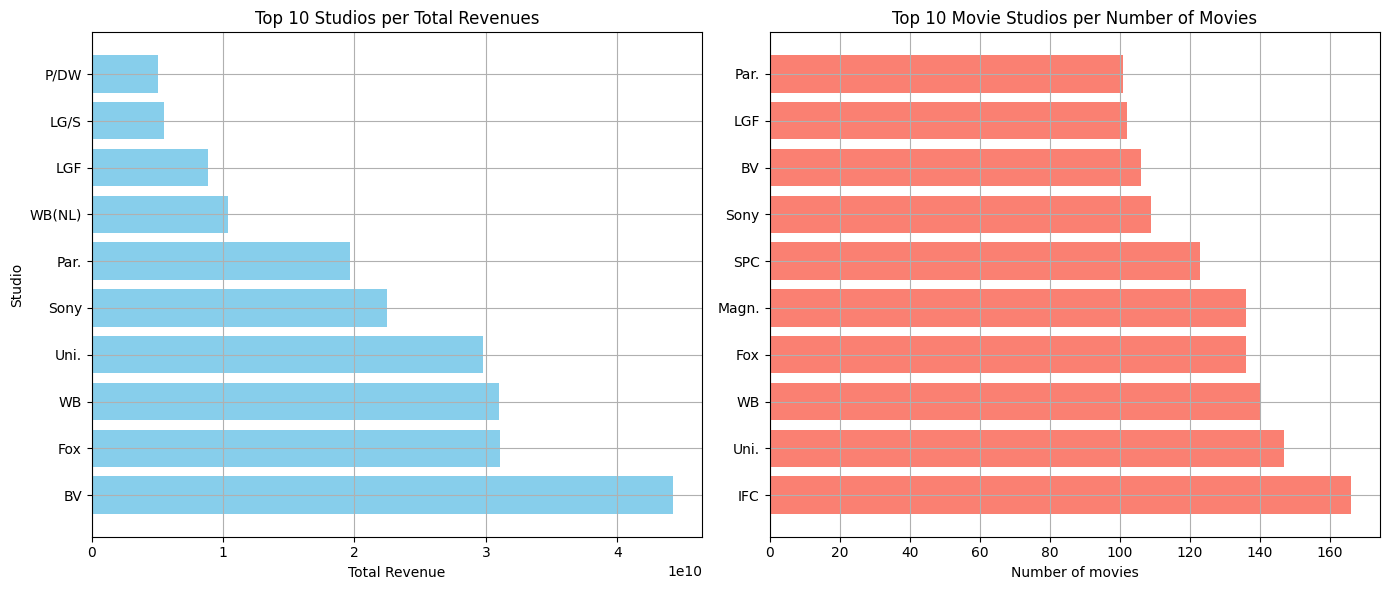

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.barh(top_ten_studios['studio'], top_ten_studios['total_revenue'], color='skyblue')
ax1.set_xlabel('Total Revenue')
ax1.set_ylabel('Studio')
ax1.set_title('Top 10 Studios per Total Revenues')
ax1.grid(True)

ax2.barh(top10_by_nummovies['index'], top10_by_nummovies['num_movies'], color='salmon')
ax2.set_xlabel('Number of movies')
ax1.set_ylabel('Studio')
ax2.set_title('Top 10 Movie Studios per Number of Movies')
ax2.grid(True)

plt.savefig('fname.png')
plt.tight_layout()
plt.show();

Observation:

1. A majority of movies appear in both charts but it is important to note that despite IFC being the highest in movie production, they do not appear in the top 10 total revenue. BV on the other hand has 16% market share in revenue but comes in 7th position in number of movies produced.
2. WB(NL), LG/S and P/DW are among the top ten movies in terms of revenue but do not make an appearance in the top ten studios in terma of movies generated.
3. Whereas; SPC, Magn. and IFC do not appear in the top ten market share in terms of revenue despite them being among the top ten movie studios to generate movies.


This is an indication that a studio does not really have to generate more movies to have more revenue. Blindly increasing movie production is not necessarily a guaranteed strategy for generating higher revenue. Factors such as film quality, marketing efforts, audience preferences, and competition within the industry also play crucial roles in determining revenue.

**DATASET TWO: tn.movie_budgets.csv**

In [24]:
# Read 'tn.movie_budgets' and explore the overview of the dataframe
movie_budgets_df = pd.read_csv('/content/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
# Understand the structure of movie_budgets_df
print('Shape of movie_budgets_df:', movie_budgets_df.shape)

movie_budgets_df.info()

Shape of movie_budgets_df: (5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Observation:

The movie_budgets_df has a total of 5782 rows and 6 columns. There are no missing values in the dataframe.


However, before proceeding with any analysis, it is necessary to convert the budget and revenue columns ('production_budget', 'domestic_gross', 'worldwide_gross') to a float datatype for further calculations and analysis. The aforementioned columns contain dollar signs ($) and commas (,) that need to be cleaned before converting the values to numeric data types.

Additionally, the 'release_date' column needs to be converted to a datetime data type to facilitate temporal analysis.

**`Clean 'production_budget', 'domestic_gross', 'worldwide_gross' columns`**

In [26]:
# Remove '$' and ',' in the 'production_budget' column and convert to float
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove '$' and ',' in the 'domestic_gross' column and convert to float
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove '$' and ',' in the 'worldwide_gross' column and convert to float
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Confirm changes
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


**`Clean release_date column`**

In [27]:
# Convert 'release_date' column to date datatype and confirm changes
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['release_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5782 entries, 0 to 5781
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
5782 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 45.3 KB


**`Clean 'movie' column`**

In [28]:
# Check for whitespaces in movie column
print('Number of values with whitespaces:', movie_budgets_df['movie'].str.contains(' ', regex=True). sum())

# Remove whitespaces in movie column
movie_budgets_df['movie'] = movie_budgets_df['movie'].str.replace(' ', '')
print('Number of values with whitespaces after correction:', movie_budgets_df['movie'].str.contains(' ', regex=True). sum())

Number of values with whitespaces: 4519
Number of values with whitespaces after correction: 0


In [29]:
# Find rows with unknown value in movie column
unknown_movie = movie_budgets_df[movie_budgets_df['movie'] == 'Unknown']
print('Number of movies with unknown titles:' , unknown_movie.shape[0])

# Drop rows with 'unknown' in a specific column
movie_budgets_df = movie_budgets_df[movie_budgets_df['movie'] != 'Unknown']

#Confirm drop, there were 5782 rows in the df
movie_budgets_df.shape[0]

Number of movies with unknown titles: 2


5780

In [30]:
# Check for duplicates
duplicated_values = movie_budgets_df.duplicated(subset=['movie'])
num_duplicates = duplicated_values.sum()
print("Number of duplicate values:", num_duplicates)

# Examine duplicate entries
duplicate_entries = movie_budgets_df[duplicated_values]
duplicate_entries.head()


Number of duplicate values: 83


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
273,74,1998-05-19,Godzilla,125000000.0,136314294.0,376000000.0
408,9,2018-11-21,RobinHood,99000000.0,30824628.0,84747441.0
484,85,2005-07-08,FantasticFour,87500000.0,154696080.0,333132750.0
543,44,1999-05-07,TheMummy,80000000.0,155385488.0,416385488.0
707,8,1997-06-13,Hercules,70000000.0,99112101.0,250700000.0


Observation:

The output indicates that there are 83 duplicate values in the 'movie' column with different release dates. Is releasing newer versions of vintage movies a viable business opportunity? We can use these duplicates to assess the changes in production_budget, domestic_gross and foreign gross for each movie that was release multiple times.

**Analyse the profitability of the production of sequels**

We start by pairing the duplicates together.

In [31]:
# Get the unique movie titles with a value count greater than one
duplicates_movie_sum = movie_budgets_df['movie'].value_counts()
titles_greater_than_one = duplicates_movie_sum[duplicates_movie_sum > 1].index

# Initialize an empty list to store values before conversion as a DataFrames
duplicate_entries_dfs = []

# Loop over each movie title with duplicate entries
for title in titles_greater_than_one:
    duplicate_entries_movie = movie_budgets_df[movie_budgets_df['movie'] == title]

    # Append the duplicate entries to the empty list
    duplicate_entries_dfs.append(duplicate_entries_movie)

# Concatenate the duplicate_entries_dfs into a single DataFrame
movies_duplicates_df = pd.concat(duplicate_entries_dfs)

# Display the combined df
movies_duplicates_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
243,44,2015-03-27,Home,130000000.0,177397510.0,385997896.0
3455,56,2009-06-05,Home,12000000.0,0.0,0.0
5459,60,2009-04-23,Home,500000.0,15433.0,44793168.0
39,40,2005-12-14,KingKong,207000000.0,218080025.0,550517357.0
2374,75,1976-12-17,KingKong,23000000.0,52614445.0,90614445.0
...,...,...,...,...,...,...
543,44,1999-05-07,TheMummy,80000000.0,155385488.0,416385488.0
38,39,2010-05-14,RobinHood,210000000.0,105487148.0,322459006.0
408,9,2018-11-21,RobinHood,99000000.0,30824628.0,84747441.0
3627,28,2000-12-19,TheGift,10000000.0,12008642.0,44567606.0


At this point we sum domestic gross and worldwide gross to get total revenue then use the total revenue to subtract production budget to get gross profit or loss of each movie per release date.

In [32]:
# Find total_revenue and gross profit/loss of each movie in that has been released more than once
movies_duplicates_df['total_revenue'] = movies_duplicates_df['domestic_gross'] + movies_duplicates_df['worldwide_gross']
movies_duplicates_df['gross_profit/loss'] = movies_duplicates_df['total_revenue'] - movies_duplicates_df['production_budget']
movies_duplicates_df.head(12)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,gross_profit/loss
243,44,2015-03-27,Home,130000000.0,177397510.0,385997896.0,563395406.0,433395406.0
3455,56,2009-06-05,Home,12000000.0,0.0,0.0,0.0,-12000000.0
5459,60,2009-04-23,Home,500000.0,15433.0,44793168.0,44808601.0,44308601.0
39,40,2005-12-14,KingKong,207000000.0,218080025.0,550517357.0,768597382.0,561597382.0
2374,75,1976-12-17,KingKong,23000000.0,52614445.0,90614445.0,143228890.0,120228890.0
5396,97,1933-04-07,KingKong,672000.0,10000000.0,10000650.0,20000650.0,19328650.0
3014,15,2007-08-31,Halloween,15000000.0,58269151.0,77514401.0,135783552.0,120783552.0
3535,36,2018-10-19,Halloween,10000000.0,159342015.0,254900667.0,414242682.0,404242682.0
5536,37,1978-10-17,Halloween,325000.0,47000000.0,70000000.0,117000000.0,116675000.0
2873,74,2009-02-13,Fridaythe13th,17000000.0,65002019.0,92670237.0,157672256.0,140672256.0


We will then calculate the difference in production budgets and profit and loss changes between the movies. The difference will be between each movie's latest release and the oldest release.

In [33]:
# Group the df by 'movie'
grouped_by_movie = movies_duplicates_df.groupby('movie' , group_keys=False)

# Calculate the budget difference and revenue difference for each duplicate movie
def calculate_differences(group):
    group = group.sort_values(by='release_date')
    group['budget_difference'] = group['production_budget'].iloc[-1] - group['production_budget'].iloc[0]
    group['gross_profit/loss_difference'] = group['gross_profit/loss'].iloc[-1] - group['gross_profit/loss'].iloc[0]
    return group

duplicates_difference_df = grouped_by_movie.apply(calculate_differences)

duplicates_difference_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,gross_profit/loss,budget_difference,gross_profit/loss_difference
5614,15,1916-12-24,"20,000LeaguesUndertheSea",200000.0,8000000.0,8000000.0,16000000.0,15800000.0,4800000.0,35600000.0
4270,71,1954-12-23,"20,000LeaguesUndertheSea",5000000.0,28200000.0,28200000.0,56400000.0,51400000.0,4800000.0,35600000.0
5016,17,1984-11-09,ANightmareonElmStreet,1800000.0,25504513.0,25504513.0,51009026.0,49209026.0,33200000.0,96595606.0
1648,49,2010-04-30,ANightmareonElmStreet,35000000.0,63075011.0,117729621.0,180804632.0,145804632.0,33200000.0,96595606.0
2032,33,1992-11-11,Aladdin,28000000.0,217350219.0,504050219.0,721400438.0,693400438.0,154000000.0,-9431810.0


We can perform statistical analysis to test the profitability of releasing newer versions of movies.

In [34]:
# Calculate the mean profit/loss change
mean_profit_loss_change = duplicates_difference_df['gross_profit/loss_difference'].mean()

print(f"Mean Profit/Loss Change: {mean_profit_loss_change}")

# Calculate the median profit/loss change
median_profit_loss_change = duplicates_difference_df['gross_profit/loss_difference'].median()

print("Median Profit/Loss Change:", median_profit_loss_change)

Mean Profit/Loss Change: 117312959.01226994
Median Profit/Loss Change: 15886381.0


Observation:

The mean profit/loss change of approximately $117,312,959.01 indicates that, on average, the gross profit/loss of movies increases by this amount between their initial release and most recent release. This could be due to various factors, such as increased audience interest, successful marketing, or expanded global distribution.

The mean is affected by outliers so to cater for outliers, we used the median as a measure of central tendancy to find the middle point of profit/loss changes. The median profit/loss change indicates that half of the movies in the dataset with multiple releases experienced a profit/loss change of less than or equal to approximately $15,886,381.0 between their earliest and latest releases. Similarly, the other half of the movies had profit/loss changes greater than or equal to this value.

For aspiring movie studios like Microsoft, the positive mean/median profit/loss change implies that there is potential for profitability in re-releasing vintage or classic movies with updated versions. It suggests that audiences are receptive to revisiting and experiencing these movies again, leading to increased revenue.

In [35]:
# Find the mean changes in budget
mean_budget_change = duplicates_difference_df['budget_difference'].mean()
mean_budget_change

44088372.969325155

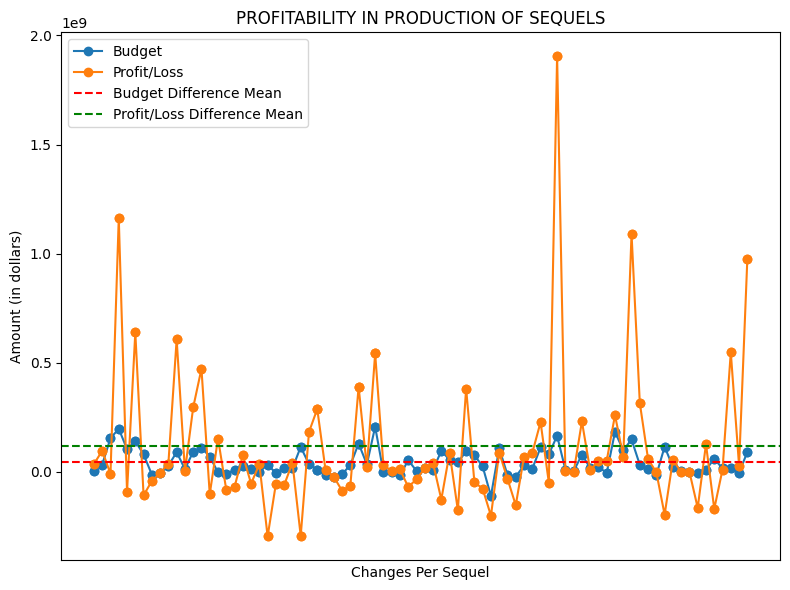

In [36]:
# Plot a line graph showing the deffirences in budget and gross profit in production of sequels
plt.figure(figsize=(8, 6))
plt.plot(duplicates_difference_df['movie'], duplicates_difference_df['budget_difference'], label='Budget', marker='o')
plt.plot(duplicates_difference_df['movie'], duplicates_difference_df['gross_profit/loss_difference'], label='Profit/Loss', marker='o')
plt.xlabel('Changes Per Sequel')
plt.ylabel('Amount (in dollars)')
plt.title('PROFITABILITY IN PRODUCTION OF SEQUELS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add the mean lines
plt.axhline(mean_budget_change, color='red', linestyle='dashed', label='Budget Difference Mean')
plt.axhline(mean_profit_loss_change, color='green', linestyle='dashed', label='Profit/Loss Difference Mean')

# Legend
plt.legend()

# Remove each movie name on the x-axis
plt.xticks([])

plt.tight_layout()
plt.show();



---



---



Observation:

Based on our analysis, it appears to be profitable to re-release vintage movies. However, it's important to consider the cost implications of production. In this regard, we will examine the general additional cost implications between the initial release and the latest release, and determine if the budget difference directly affects the changes in profit/loss.

To investigate this, we will assess the relationship between the budget difference (i.e., the difference in production budget between the first and latest release) and the corresponding changes in profit/loss. By analyzing this relationship, we can determine if there is a direct connection between the budget difference and the resulting profit/loss changes.

In [37]:
# Find the correlation coefficient between budget_difference and revenue_difference
correlation_coefficient = duplicates_difference_df['budget_difference'].corr(duplicates_difference_df['gross_profit/loss_difference'])

print("Correlation Coefficient:",correlation_coefficient)

Correlation Coefficient: 0.5639794295116293


Observation:

The correlation coefficient of 0.5639794295116293 indicates a moderate positive correlation between the budget_difference and revenue_difference. The positive correlation coefficient implies that as the budget difference increases, the revenue difference also tends to increase. This means that movies with higher budget differences may have higher revenue differences, indicating potential increased profitability.

We can use a scatterplot to visualize this correlation.

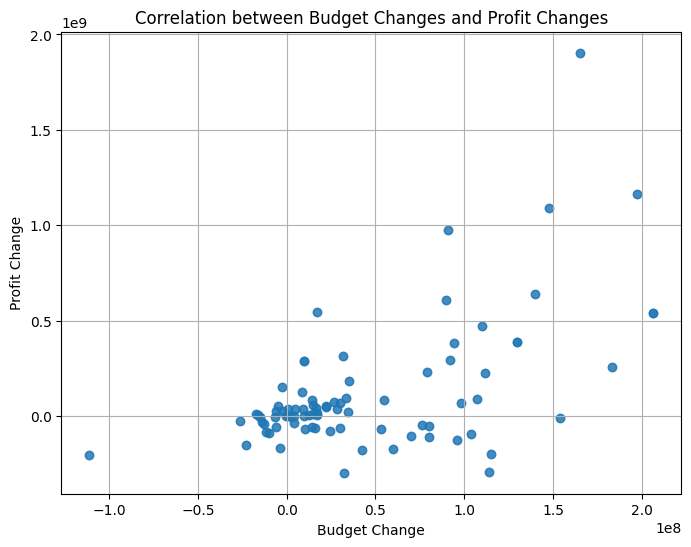

In [38]:
# Plot a scatter plot between budget difference and gross profit/loss difference

plt.figure(figsize=(8, 6))
plt.scatter(duplicates_difference_df['budget_difference'], duplicates_difference_df['gross_profit/loss_difference'], alpha=0.6)
plt.xlabel('Budget Change')
plt.ylabel('Profit Change')
plt.title('Correlation between Budget Changes and Profit Changes')
plt.grid(True)
plt.show();


Observation:

The scatter plot shows a general positive trend. As the budget difference increases, there is a tendency for the gross profit/loss difference to increase as well. This indicates that movies with larger budget differences tend to have greater profit/loss differences between their earliest and latest releases.

However, while there is a positive correlation, the data points are scattered, indicating that the relationship between budget changes and profit/loss changes is not perfectly linear. Other factors besides budget differences may also influence the resulting profit/loss changes.

Some data points deviate from the general trend and are located far from the main cluster. These outliers represent movies with unusual budget and profit/loss differences compared to the majority of the dataset.



---



---



Other factors like marketing, critical reception, genre, and audience demand should be considered in a comprehensive analysis. We will look into various datasets that include ratings, genre and producers to take this into account.

**`DATASET THREE: imdb.title.ratings.csv.gz and imdb.title.basics.csv`**

In [39]:
# Read imdb.title.ratings.csv.gz dataset
title_ratings_df = pd.read_csv('/content/imdb.title.ratings.csv.gz')
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [40]:
# Understand the structure of title_ratings_df
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Observation:

IMDB definition of tconst is alphanumeric unique identifier of the title.

To complete our analysis, we require additional information about the names of movies with IDs that match the IDs in title_ratings_df in order to get movie names, which is crucial for a comprehensive understanding of the data.



In [41]:
# Read imdb.title.basics.csv
title_basics_df = pd.read_csv('/content/imdb.title.basics.csv')
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [42]:
# Understand the structure of title_basics_df
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Observation:

The dataset, title_basics_df,  provides comprehensive information about various movie attributes, such as titles, release year, runtime, and genres. It complements the title_ratings_df dataset that lacked movie names. We can join these two df on tconst as a primary key.

The title_basics_df dataset contains missing values in some columns; original_title, runtime_minutes and genres. We shall first join this dataset with title_ratings_df then handle missing values as we analyse ratings per genres and runtime.

*We shall work with movie_ratings_df going forward after the join.*

In [43]:
# Join title_basics_df and title_ratings_df and view the new df
movie_ratings_df = title_basics_df.merge(title_ratings_df, on='tconst', how='inner')
movie_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [44]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [45]:
movie_ratings_df.isnull().mean() * 100

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

Observation:

By imbd definition:
  1. primaryTitle is the more popular title / the title used by the filmmakers on promotional materials at the point of release
  2. originalTitle is original title, in the original language.

We will drop the originalTitle and use the primaryTitle as a reference point for movie names.

In movie_ratings_df, there are missing values in some of the columns; runtime_minutes and genres. We shall handle missing values prior to analysis.

The missing values in genre cannot be replaced as there lacks a criteria for replacement in addition to the small percentage they occupy hence dropping them is ideal. The runtime missing values can be replaced by the mean, mdeian or mode.



**`Clean genres column`**

In [46]:
# Drop missing values in genres and confirm drop
movie_ratings_df = movie_ratings_df.dropna(subset=['genres'])

print("Number of missing values in 'genres' column after dropping:", movie_ratings_df['genres'].isnull().sum())

Number of missing values in 'genres' column after dropping: 0


In [47]:
# Count unwanted special characters in genres column, if any remove them

commas_movie_ratings = movie_ratings_df['genres'].str.count(',')
whitespaces_movie_ratings = movie_ratings_df['genres'].str.count(' ')
numerals_movie_ratings = movie_ratings_df['genres'].str.count(r'\d').sum()

print("Number of commas in genres:", commas_movie_ratings.sum())
print("Number of whitespaces in genres:", whitespaces_movie_ratings.sum())
print("Number of numerals in genres:", numerals_movie_ratings)

Number of commas in genres: 55438
Number of whitespaces in genres: 0
Number of numerals in genres: 0


Observation:

Some movies have more than two genres that are separated by columns.So we shall not replace the commas.

In [48]:
# Check for duplicates
num_duplicates_in_genre = movie_ratings_df.duplicated(subset=['genres']).sum()
print("Number of duplicate entries in 'genres' column:", num_duplicates_in_genre)

Number of duplicate entries in 'genres' column: 72129


Observation:

The number of duplicates in genres indicates that a majority of the movies in the dataset have the same genre combinations.

**`Clean runtime_minutes column`**

We will handle the missing values in the runtime_minutes column by filling them in based on the average runtime of the genres to which they belong. This approach is more appropriate because different genres tend to have varying runtimes. For instance, Bollywood genres often have longer runtimes compared to other genres. Using the overall average runtime would not accurately reflect the characteristics of each genre the movies belong to, so filling the missing values with genre-specific runtime averages allows us to make a more informed and genre-specific estimation of the runtimes for the movies with missing values.

In [49]:
# Initial number of missing values
print('Missing values in runtime_minutes column before fill:' , movie_ratings_df['runtime_minutes'].isna().sum())

# Find the genres with missing values in runtime_minutes column
genres_with_missing_runtime = movie_ratings_df[movie_ratings_df['runtime_minutes'].isnull()]['genres'].unique()

# Calculate the average runtime for each genre
genre_avg_runtime = movie_ratings_df.groupby('genres')['runtime_minutes'].mean()

# Fill missing values with the mean of their respective genres
for genre in genres_with_missing_runtime:
    mean_runtime = genre_avg_runtime[genre]
    movie_ratings_df.loc[movie_ratings_df['genres'] == genre, 'runtime_minutes'] = movie_ratings_df.loc[movie_ratings_df['genres'] == genre, 'runtime_minutes'].fillna(mean_runtime)

print('Missing values in runtime_minutes column after fill:' , movie_ratings_df['runtime_minutes'].isna().sum())

Missing values in runtime_minutes column before fill: 7332
Missing values in runtime_minutes column after fill: 19



After filling in the missing values using the genre-specific average runtimes, there are still 19 remaining missing values in the runtime_minutes column. Although this is a significant reduction from the initial 7,332 missing values, it indicates that not all movies have similar genre combinations, and therefore, genre-specific averages might not be applicable to every movie.

The 19 movies with missing runtime values represent uncommon genre combinations and contribute relatively little to the overall movie_ratings_df dataset. To maintain the accuracy of the data and avoid any potential bias introduced by these missing values, we have decided to drop these 19 entries from the dataset.

In [50]:
# Drop rows with missing values in the runtime_minutes column
movie_ratings_df = movie_ratings_df.dropna(subset=['runtime_minutes'])

# Confirm dropped missing values
print('Missing values in runtime_minutes column after drop:' , movie_ratings_df['runtime_minutes'].isna().sum())


Missing values in runtime_minutes column after drop: 0




---



---



**`ANALYSIS`**

In May, 2023 imdb.com received 1.09B visits with the average session duration of 06:47. IMDb ratings can be a helpful reference point for gauging public opinion and popularity. Positive ratings from both critics and audiences can play a crucial role in determining the success of a movie. Favorable word-of-mouth and high ratings can lead to increased ticket sales and sustained performance. Therefore, ratings serve as a fundamental aspect of a movie's overall success.

In our analysis, we aim to identify the variables that have a significant impact on movie ratings. Specifically, we will investigate which genre combinations tend to receive the highest ratings from both critics and audiences. Additionally, we will explore whether the runtime of a movie, i.e., its duration, has any influence on the ratings it receives.

By understanding the factors that contribute to high ratings, we can gain insights into the elements that make a movie more appealing to both critics and audiences. This knowledge can be valuable for filmmakers and production companies, helping them create movies that have a higher chance of achieving critical acclaim and commercial success.

**Explore genre ratings, popularity and runtime**

On IMDb, a rating of around 7.0 or higher (out of 10) is generally considered quite good and indicative of a well-received movie. Here we shall see whether the length of the movie (runtime) or the number of votes generated an average rating of 7.0 and above. We shall use a heatmap to visualise this correlation.

In [51]:
# Filter movies with average rating of 7 and above
high_rated_movies = movie_ratings_df[movie_ratings_df['averagerating'] >= 7]

# Calculate the correlation matrix
correlation_matrix = high_rated_movies[['runtime_minutes', 'averagerating', 'numvotes']].corr()

# Display the correlation matrix
correlation_matrix


,runtime_minutes,averagerating,numvotes
runtime_minutes,1.000000,-0.081552,0.120927
averagerating,-0.081552,1.000000,-0.029029
numvotes,0.120927,-0.029029,1.000000


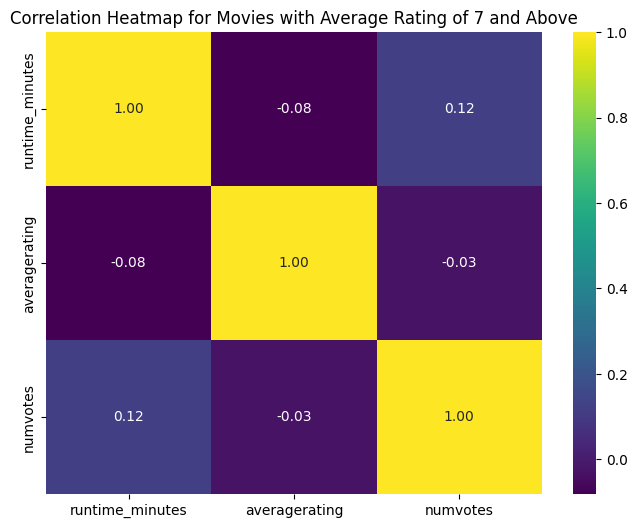

In [52]:
# Create a heatmap to visualize this correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap for Movies with Average Rating of 7 and Above')
plt.show();

Observation:

1. runtime_minutes and averagerating have a weak negative correlation of approximately -0.0815. This suggests that there is a slight tendency for movies with longer runtime to have slightly lower average ratings. However, the correlation is weak, so the relationship between runtime and rating is not significant.

2. averagerating and numvotes have a weak negative correlation of approximately -0.0290. This indicates that movies with higher average ratings tend to have slightly fewer votes. Again, the correlation is weak, so there is no strong relationship between average rating and the number of votes.

3. runtime_minutes and numvotes have a weak positive correlation of approximately 0.1209. This means that movies with longer runtime tend to have slightly more votes. However, similar to the other correlations, the relationship is weak, so the impact of runtime on the number of votes is not substantial.



**`Analyse genre combinations with ratings, runtime and num of votes`**

Since the correlations are generally weak, indicating that other factors may play a more significant role in determining the success and popularity of these well-rated films. We will proceed to analyze genres to identify the top 10 best performing genres in terms of ratings. We will then determine the average runtime of these genres to understand their performance characteristics. Additionally, we will use the number of votes as a proxy for the popularity of these well-rated genres. This analysis will help us gain insights into other factors contributing to the success and appeal of highly-rated movies.

Top 10 best performing genres in terms of ratings:

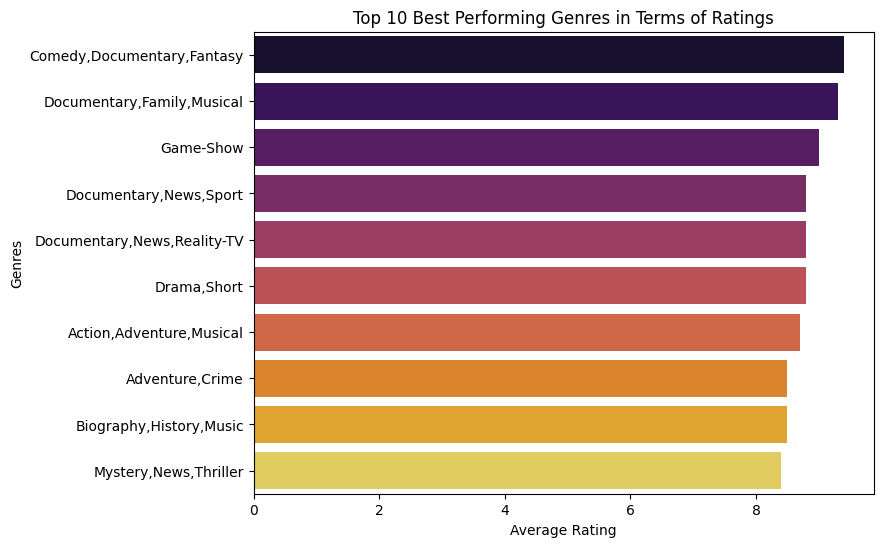

In [53]:
# Sort the genres based on their average rating in descending order
# Note that we have averaged average rating, not to worry since we are averaging the average rating per genre

best_performing_genres = movie_ratings_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Create a bar chart for top 10 best performing genres in terms of average rating
plt.figure(figsize=(8, 6))
sns.barplot(x=best_performing_genres.head(10).values, y=best_performing_genres.head(10).index, palette='inferno')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Top 10 Best Performing Genres in Terms of Ratings')
plt.xticks(rotation=0, ha='center')
plt.show();

Observation:

Besides the usual action, drama, comedy and thriller genres gannering high ratings over the years. There is unusual 'less fun' genres that have high ratings.

Documentary genre appears multiple times in the top ten combinations with the highest average rating. Documentaries are known for presenting real-life stories, events, or issues. Audiences often appreciate the authenticity and realism of documentary storytelling, which can lead to higher ratings.

News, and reality TV appeal to a broad range of audiences with varying interests. Their versatility can attract different viewer demographics, resulting in higher ratings overall.

Biography and history genres offer insights into the lives of prominent individuals and historical events. Audiences appreciate learning about significant figures and moments that have shaped the world, making these genres highly engaging and informative.

These 'less fun' genres have one thing in common: they tell the personal stories of individuals, highlighting their struggles, triumphs, and contributions. These human stories can evoke strong emotions and create a powerful connection with viewers, leading to higher ratings.

Performance characteristics of top 10 genres in terms of runtime:

In [54]:
# Get the top 10 genres based on average ratings
top_10_genres = best_performing_genres.head(10).index

# Filter the movie_ratings_df to include only the top 10 genres
top_10_genres_df = movie_ratings_df[movie_ratings_df['genres'].isin(top_10_genres)]

# Calculate the average runtime for each genre
average_runtime_per_genre = top_10_genres_df.groupby('genres')['runtime_minutes'].mean().reset_index()

average_runtime_per_genre

,genres,runtime_minutes
0,"Action,Adventure,Musical",97.0
1,"Adventure,Crime",100.0
2,"Biography,History,Music",84.0
3,"Comedy,Documentary,Fantasy",70.0
4,"Documentary,Family,Musical",59.0
5,"Documentary,News,Reality-TV",61.0
6,"Documentary,News,Sport",85.0
7,"Drama,Short",18.0
8,Game-Show,130.0
9,"Mystery,News,Thriller",88.0


Let us visualize this data.

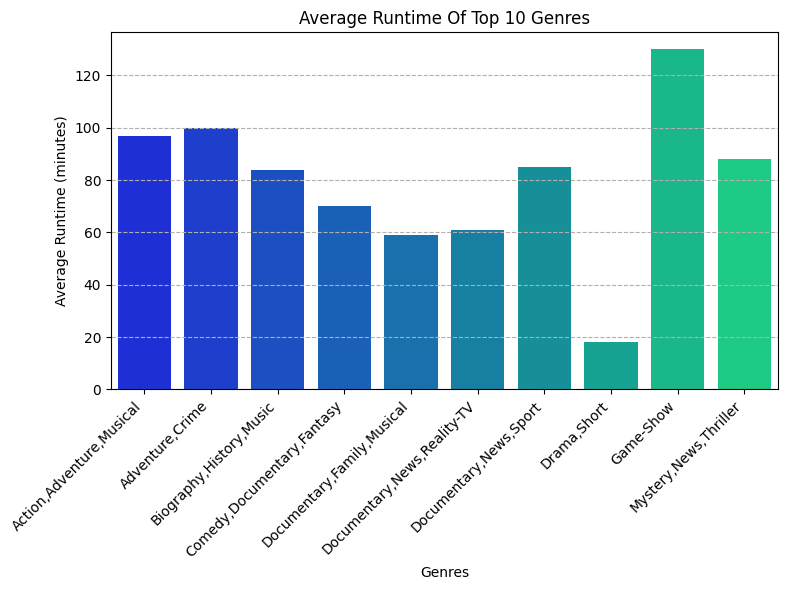

In [55]:
# Plot a bar chart of average runtime for each top performing genre combinations
plt.figure(figsize=(8, 6))
sns.barplot(data=average_runtime_per_genre, x='genres', y='runtime_minutes', palette='winter')
plt.xlabel('Genres')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime Of Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='dashed')
plt.tight_layout()
plt.show();

These values represent the average runtime for each top performing genre combination, providing insights into the typical length of movies or TV shows within each genre with the highest ratings. For example, Game-Show has the longest average runtime (130 minutes), while Drama, Short has the shortest average runtime (18 minutes). The data can help Microsoft Studio understand audience preferences and expectations regarding runtime in different genres.

Popularity of top 10 genre combination by estimate of average number of votes:

In [56]:
# Calculate the average number of votes for each genre
average_numvotes_per_genre = top_10_genres_df.groupby('genres')['numvotes'].mean().reset_index()

average_numvotes_per_genre

,genres,numvotes
0,"Action,Adventure,Musical",42.0
1,"Adventure,Crime",15.0
2,"Biography,History,Music",6.0
3,"Comedy,Documentary,Fantasy",5.0
4,"Documentary,Family,Musical",19.0
5,"Documentary,News,Reality-TV",8.0
6,"Documentary,News,Sport",25.0
7,"Drama,Short",8.0
8,Game-Show,7.0
9,"Mystery,News,Thriller",92.0


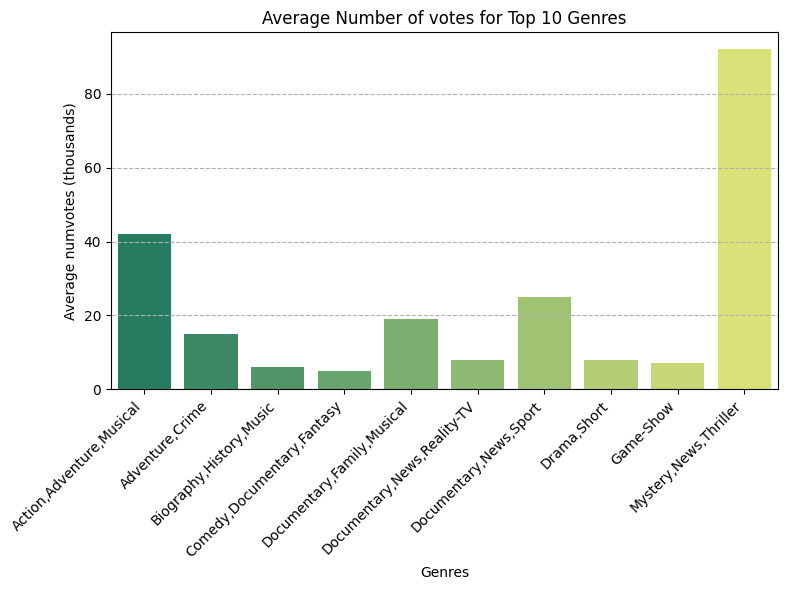

In [57]:
# Plot a bar chart of average runtime for each top performing genre combinations
plt.figure(figsize=(8, 6))
sns.barplot(data=average_numvotes_per_genre, x='genres', y='numvotes', palette='summer')
plt.xlabel('Genres')
plt.ylabel('Average numvotes (thousands)')
plt.title('Average Number of votes for Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='dashed')
plt.tight_layout()
plt.show();

Observation:

We can see that the genre combination "Mystery, News, Thriller" has the highest average number of votes, indicating that it is the most popular genre combination among the top 10. On the other hand, genres like "Comedy, Documentary, Fantasy" and "Biography, History, Music" have lower average numbers of votes, suggesting they might be less popular among viewers.

It's important to note that the number of votes is an indication of a movie's popularity and audience engagement.  However, the sample size for each genre combination may vary, which can affect the average number of votes.



---



**Select seasoned crew members per genre**

To gain deeper insights into audience preferences, we will analyze the producers and directors involved in the making of top-rated movies. Understanding the key contributors to successful films within specific genres can guide us in selecting the right producers and directors for future movie projects. By aligning the expertise of these professionals with audience preferences, we can enhance the chances of producing successful movies that cater to the specific tastes of the target audience.

We will start by creating a df that stores all genres that have average rating of 7.0 and above:

In [58]:
# Filter movies with genres that have an average rating greater than 7.0
high_rated_genres_df = movie_ratings_df.groupby('genres')['averagerating'].mean().reset_index()
high_rated_genres_df = high_rated_genres_df[high_rated_genres_df['averagerating'] > 7.0]

# Merge with the movie_ratings_df to get the tconst and primary_title
top_rated_movies_df = movie_ratings_df.merge(high_rated_genres_df[['genres']], on='genres', how='inner')

# Select only the necessary columns
top_rated_movies_df = top_rated_movies_df[['tconst', 'genres', 'primary_title', 'start_year']]

top_rated_movies_df


,tconst,genres,primary_title,start_year
0,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013
1,tt0170651,Documentary,T.G.M. - osvoboditel,2018
2,tt0262218,Documentary,Akakis mogzauroba,2012
3,tt0285423,Documentary,Abolição,2019
4,tt0417750,Documentary,Hempsters: Plant the Seed,2010
...,...,...,...,...
17880,tt7957456,"Action,Adventure,Musical",L'impasse. La route.,2018
17881,tt8305366,"Adventure,Animation,Crime",The Jester's Plane: A Curious Journey Down the...,2018
17882,tt8318556,"History,Mystery,Thriller",141 A.D. Mission in Dacia,2018
17883,tt8413518,"Musical,Mystery,Sci-Fi",Commanding Cue,2019


To identify the producers and directors who have had multiple 7.0+ ratings in their work, we will first join the top_rated_movies_df with a DataFrame that contains information about movie crew, including producers and directors.

**`DATASET FOUR: imdb.title.principals.csv`**

In [59]:
# Read into the imdb.title.principles
crew_df = pd.read_csv('/content/imdb.title.principals.csv')
crew_df.head(20)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [60]:
# Understand the structure of crew_df
crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


Observation:

There are missing values in the job and characters column. After inspecting the df and based off of the analysis we want to compute, we do not need the job, characters and ordering columns. We shall drop these columns.

In [61]:
# Drop the unnecessary columns and confirm the drop
crew_df = crew_df.drop(['job', 'characters', 'ordering'], axis=1)

crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   nconst    1028186 non-null  object
 2   category  1028186 non-null  object
dtypes: object(3)
memory usage: 23.5+ MB


The remaining columns are well structured with no missing values. Now we can join the top_rated_movies_df to get the producers, directors and script writers of those movies that scored > 7.0 in ratings.

In [62]:
# Merge crew_df and top_rated_movies_df using the 'tconst' column
crew_top_movies_df = top_rated_movies_df.merge(crew_df, on='tconst', how='left')

crew_top_movies_df

,tconst,genres,primary_title,start_year,nconst,category
0,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm1347778,editor
1,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm0001832,actor
2,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm0137230,actor
3,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm0186908,actress
4,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm0000018,self
...,...,...,...,...,...,...
122698,tt9060598,"Drama,Short",Requiescat,2018,nm1761332,director
122699,tt9060598,"Drama,Short",Requiescat,2018,nm4991212,producer
122700,tt9060598,"Drama,Short",Requiescat,2018,nm2401787,composer
122701,tt9060598,"Drama,Short",Requiescat,2018,nm3517217,cinematographer


In [63]:
crew_top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122703 entries, 0 to 122702
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         122703 non-null  object
 1   genres         122703 non-null  object
 2   primary_title  122703 non-null  object
 3   start_year     122703 non-null  int64 
 4   nconst         122662 non-null  object
 5   category       122662 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.6+ MB


Here we notice that the number of rows have reduced from 1,028,186 to 122703. This is because the rows have reduced to fit the top_rated_movies_df that had 17,885 rows. It is important to note that crew_top_movies have multiple entries per movie because each move has extra rows to fit in the crew members details.

There are missing values in the nconst and category columns, we will therefore handle them before proceeding with analysis.


In [64]:
# Find % of missing values in crew_top_movies_df
crew_top_movies_df.isna().mean() *100

tconst           0.000000
genres           0.000000
primary_title    0.000000
start_year       0.000000
nconst           0.033414
category         0.033414
dtype: float64

We shall drop the missing values as they contribute to very little to the dataset.

In [65]:
# Drop missing values and confirm the drop
crew_top_movies_df = crew_top_movies_df.dropna()
crew_top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122702
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         122662 non-null  object
 1   genres         122662 non-null  object
 2   primary_title  122662 non-null  object
 3   start_year     122662 non-null  int64 
 4   nconst         122662 non-null  object
 5   category       122662 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.6+ MB


In [66]:
# Understand the staff in the crew_top_movies_df
crew_top_movies_df['category'].value_counts()

self                   30500
director               20090
producer               15326
cinematographer        13012
composer               11658
editor                 11215
actor                  10002
writer                  5319
actress                 3357
archive_footage         1893
production_designer      283
archive_sound              7
Name: category, dtype: int64

We shall narrow down the category column to remain with the directors as key staff during a movie production.

In [67]:
# Remain with director and confirm changes
staff_needed = ['director']
crew_top_movies_df = crew_top_movies_df[crew_top_movies_df['category'].isin(staff_needed)]
crew_top_movies_df['category'].value_counts()

director    20090
Name: category, dtype: int64

It is clear here we only have the titles of the primary staff in movie production. We need to get the names of these brilliant movie production professionals and be able to handpick them for the various genres we might want to start our movie projects on. We will find a dataset with these values.

**`DATASET FIVE: name.basics.tsv`**

In [68]:
# Read the file file with crew names
crew_names_df = pd.read_csv('/content/name.basics.tsv', delimiter='\t')
crew_names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"


In [69]:
# Understand the structure of the df
crew_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934023 entries, 0 to 4934022
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 225.9+ MB


This crew_names_df has the names we need for the key staff in movie productions. However some crew members are, unfortunately, not alive hence the death year column.

There is an no indication of presence of null values(if any) in the df. We need to find them manually.

After sorting these two things is when we will be able to join/merge crew_names_df and crew_top_rated using nconst with is the ID of the names of these crew members.

In [70]:
# Find % of missing values
crew_names_df.isna().mean() * 100

nconst                0.000000
primaryName           0.000020
birthYear             0.000000
deathYear             0.000000
primaryProfession    21.737576
knownForTitles        0.000000
dtype: float64

We have negligible missing values in the primaryName, birthYear, deathYear and knownForTitles. While primaryProfession has 12% missing values.

We must remember that the use for the df is to join with crew_top_movies_df, we will not need columns; knownForTitles as we already have tconst and primaryProfession as we already have category, these are the two columns we will drop. Then drop all null values in the dataframe.

In [71]:
# Drop knownForTitles and primaryProfession columns and confirm drop
crew_names_df = crew_names_df.drop(columns = ['knownForTitles', 'primaryProfession'])
crew_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934023 entries, 0 to 4934022
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   nconst       object
 1   primaryName  object
 2   birthYear    object
 3   deathYear    object
dtypes: object(4)
memory usage: 150.6+ MB


In [72]:
# Drop missing values in the remaining components of the df and confirm there are no missing values
crew_names_df = crew_names_df.dropna()
crew_names_df.isna().sum()

nconst         0
primaryName    0
birthYear      0
deathYear      0
dtype: int64

The basic clean up is done and we not need to retain the top crew members who are alive:

In [73]:
crew_names_df['deathYear'].value_counts()

\N      4777183
2021       4063
2020       3946
2022       3780
2019       3207
         ...   
1713          1
1684          1
1601          1
1031          1
1701          1
Name: deathYear, Length: 396, dtype: int64

In [74]:
crew_names_df['birthYear'].value_counts()

\N      4603468
1970       4812
1971       4466
1947       4451
1969       4436
         ...   
1739          1
1727          1
1659          1
1635          1
1636          1
Name: birthYear, Length: 442, dtype: int64

We now have a df we can use to merge with crew_top_movies_df.

In [75]:
# Merge crew_top_movies_df and crew_names_df using the nconst column
top_crew_names_df = crew_top_movies_df.merge(crew_names_df, on='nconst', how='inner')

top_crew_names_df.head()


,tconst,genres,primary_title,start_year,nconst,category,primaryName,birthYear,deathYear
0,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm0611850,director,John Mulholland,\N,\N
1,tt0170651,Documentary,T.G.M. - osvoboditel,2018,nm0161615,director,Vera Chytilová,1929,2014
2,tt0277964,"Documentary,History",Prague: The Restless Heart of Europe,2018,nm0161615,director,Vera Chytilová,1929,2014
3,tt0262218,Documentary,Akakis mogzauroba,2012,nm0024093,director,Vasil Amashukeli,\N,\N
4,tt0285423,Documentary,Abolição,2019,nm0119856,director,Zózimo Bulbul,1937,2013


In [76]:
# Understand the structure of top_crew_names_df
top_crew_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 0 to 6211
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tconst         6212 non-null   object
 1   genres         6212 non-null   object
 2   primary_title  6212 non-null   object
 3   start_year     6212 non-null   int64 
 4   nconst         6212 non-null   object
 5   category       6212 non-null   object
 6   primaryName    6212 non-null   object
 7   birthYear      6212 non-null   object
 8   deathYear      6212 non-null   object
dtypes: int64(1), object(8)
memory usage: 485.3+ KB


Since that df is clean, we need to handle the dead crew members and remain with the ones that are alive.

In [77]:
# Find the value_counts of the deathYear column
top_crew_names_df['deathYear'].value_counts()

\N      6042
2019      22
2014      22
2020      18
2022      18
2021      18
2017      15
2018      11
2015       9
2023       9
2016       7
2011       6
2012       5
2013       5
2003       1
2006       1
2008       1
1994       1
2007       1
Name: deathYear, dtype: int64

We can begin with removing all rows that are not /N as they are clear depiction of dead crew members. \N is just a representation of missing data used in this particular df.

In [78]:
# Remove the rows with actual years and retain \N and confirm the value_counts
top_crew_names_df = top_crew_names_df[top_crew_names_df['deathYear'] == '\\N']

top_crew_names_df['deathYear'].value_counts()

\N    6042
Name: deathYear, dtype: int64

We can not explore the df and see how to find the crew members that are still alive.

In [79]:
# Check the df components
top_crew_names_df

,tconst,genres,primary_title,start_year,nconst,category,primaryName,birthYear,deathYear
0,tt0159369,Documentary,Cooper and Hemingway: The True Gen,2013,nm0611850,director,John Mulholland,\N,\N
3,tt0262218,Documentary,Akakis mogzauroba,2012,nm0024093,director,Vasil Amashukeli,\N,\N
5,tt0417750,Documentary,Hempsters: Plant the Seed,2010,nm0377412,director,Michael P. Henning,\N,\N
6,tt0430524,Documentary,The Rescuer,2011,nm0342041,director,Leo Grillo,1949,\N
7,tt0436782,Documentary,A Life in the Death of Joe Meek,2013,nm0074206,director,Howard S. Berger,\N,\N
...,...,...,...,...,...,...,...,...,...
6207,tt4301200,"Fantasy,History,Music","Ato, Atalho e Vento",2014,nm0556034,director,Marcelo Masagão,1958,\N
6208,tt4411878,"History,Musical,Romance",Andrea Chénier: Live from the Royal Opera House,2015,nm0368662,director,Jonathan Haswell,\N,\N
6209,tt6448688,"Animation,Drama,Sport",Yowamushi Pedal Re: Ride,2014,nm1238441,director,Osamu Nabeshima,1956,\N
6210,tt7392028,"Animation,Drama,Sport",Yowamushi Pedal Re: Road,2015,nm1238441,director,Osamu Nabeshima,1956,\N


According to University of South Carolina research done in the film industry, the average age of male directors is (46.2 years) and female directors is (47.4 years) at the time of a film's release.

In [80]:
# Sort by birth year
top_crew_names_df = top_crew_names_df.sort_values(by = 'birthYear', ascending = True)
top_crew_names_df.head()

,tconst,genres,primary_title,start_year,nconst,category,primaryName,birthYear,deathYear
1407,tt2118032,Documentary,The Maze,2011,nm0950001,director,Robert M. Young,1924,\N
3183,tt5247282,Documentary,Informe general II. El nou rapte d'Europa,2015,nm0691908,director,Pere Portabella,1927,\N
3552,tt6151650,Documentary,Mjesto sjecanja: Vukovar,2015,nm0119819,director,Veljko Bulajic,1928,\N
554,tt8749146,Documentary,"Monrovia, Indiana",2018,nm0936464,director,Frederick Wiseman,1930,\N
553,tt6209282,Documentary,Ex Libris: The New York Public Library,2017,nm0936464,director,Frederick Wiseman,1930,\N


We still have birth years as early as 1906, meaning some \N values in deathYear are true missing values and some are for people who are alive.

In [81]:
# Get value counts of birth years
top_crew_names_df['birthYear'].value_counts()

\N      3605
1967     104
1966     100
1964      99
1963      93
        ... 
1991       1
1985       1
1927       1
1933       1
1924       1
Name: birthYear, Length: 67, dtype: int64


To cater for unique ages, we shall filter top crew members who are currently under the age of 65 years.

In [82]:
# Filter the birth year to have only crew members that have birth years of 1959 and above.
top_crew_names_df = top_crew_names_df[(top_crew_names_df['birthYear'] >= '1959')]
top_crew_names_df['birthYear'].value_counts()

\N      3605
1967     104
1966     100
1964      99
1970      93
1963      93
1965      89
1973      84
1969      83
1959      81
1968      73
1961      71
1972      69
1962      64
1960      61
1971      55
1974      52
1979      48
1975      43
1976      37
1977      36
1978      19
1980      16
1984      13
1983      12
1981       9
1982       3
1986       3
1987       2
1988       2
1989       2
1985       1
1990       1
1991       1
2003       1
Name: birthYear, dtype: int64


Now, we are faced with the issue of the "\N" values in the birth year. However, it presents an opportunity to explore a new dataset from IMDB, containing the names of directors, which is part of a recently updated dataset.

We have successfully obtained a dataset, movies.csv, comprising the top 250 movies, each with a rating of 8.0 and above. This dataset proves to be more suitable and promising for our analysis, providing a better foundation to work with as we delve deeper into find the world's top rated directors per genre.

**`DATASET FIVE: movies.csv`**

In [83]:
# Read movies.csv
directors_df = pd.read_csv('/content/movies.csv')
directors_df.head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...


We will narrow this dataset down to movies released from the year 2000.

In [84]:
# Remain with movies produced from the year 2000
directors_df = directors_df[directors_df['year'] >= 2000]
directors_df.head(2)

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
6,7,tt0167260,The Lord of the Rings: The Return of the King,2003,1786498,9.0,U,201,"Action,Adventure,Drama","nm0000704,nm0001557,nm0005212,nm0089217,nm0032...","Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",nm0001392,Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens","nm0866058,nm0909638,nm0101991",https://m.media-amazon.com/images/M/MV5BOGM4ZT...


We will now drop the columns we do not need.

In [85]:
# Drop the unecessary columns and understand the df
directors_df = directors_df.drop(columns = ['rank', 'name' , 'id' ,'imbd_votes', 'year', 'imdb_rating', 'certificate', 'duration', 'cast_id', 'cast_name', 'director_id', 'writter_id', 'img_link'])
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 2 to 248
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   genre          97 non-null     object
 1   director_name  97 non-null     object
 2   writter_name   97 non-null     object
dtypes: object(3)
memory usage: 3.0+ KB


In [86]:
# View the df
directors_df.head()

,genre,director_name,writter_name
2,"Action,Crime,Drama",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
6,"Action,Adventure,Drama",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
8,"Action,Adventure,Drama",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"
12,"Action,Adventure,Sci-Fi",Christopher Nolan,Christopher Nolan
13,"Action,Adventure,Drama",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens"


In [87]:
# Check for duplicates in genres
duplicated_genres = directors_df.duplicated(subset=['genre'])
print('Number of duplicate values:' , duplicated_genres.sum())

Number of duplicate values: 46


In [88]:
# Drop duplicated genres
directors_df = directors_df.drop_duplicates('genre', keep= False)

In [89]:
# View the df
directors_df

,genre,director_name,writter_name
22,"Crime,Drama","Fernando Meirelles,Kátia Lund","Paulo Lins,Bráulio Mantovani"
26,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Jonathan Nolan,Christopher Nolan"
32,"Biography,Drama,Music",Roman Polanski,"Ronald Harwood,Wladyslaw Szpilman"
40,"Drama,Mystery,Sci-Fi",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,Christopher P..."
43,"Drama,Music",Damien Chazelle,Damien Chazelle
56,"Drama,Western",Quentin Tarantino,Quentin Tarantino
70,"Action,Drama,Mystery",Park Chan-wook,"Garon Tsuchiya,Nobuaki Minegishi,Park Chan-wook"
77,"Adventure,Drama,War",Quentin Tarantino,Quentin Tarantino
84,"Animation,Drama,Fantasy",Makoto Shinkai,"Makoto Shinkai,Clark Cheng"
86,"Comedy,Drama",Rajkumar Hirani,"Rajkumar Hirani,Abhijat Joshi,Vidhu Vinod Chopra"


In [90]:
# Find the number of directors and writers
directors_df.shape

(29, 3)

Observation:

We have remained with directors and writers from 29 different genre combinations. This shall be converted into an spreadsheet and used to source these seasoned directors and writers.

# CONCLUSION

In pursuit of success in the movie industry, Microsoft can leverage valuable insights from top movie studios, adopting their effective marketing and production strategies. By studying and emulating proven approaches, Microsoft can gain a competitive edge in this dynamic landscape.

Additionally, a strategic focus on popular genres during their initial movie production will be essential. By aligning with audience preferences, Microsoft can attract a wider viewership, ensuring a successful entry into the industry.

Moreover, prioritizing movie quality over extravagant budgets will be paramount. Emphasizing compelling storytelling, well-crafted scripts, and collaborating with experienced directors and writers will resonate with audiences and critics, elevating the overall cinematic experience.

Through collaboration with seasoned industry professionals, Microsoft can create an environment that fosters creativity and innovation, setting the stage for remarkable cinematic triumphs.

By adhering to these recommendations, Microsoft can effectively overcome entry barriers in the movie industry and establish a robust presence. By synergizing their technological expertise with high-quality filmmaking, they are poised to deliver captivating films that leave a lasting impact on audiences.